In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [43]:
# Loading the load_iris dataset
iris = load_iris()

In [44]:
# Creating a DataFrame with feature data
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Adding target as a new column
df['target'] = iris.target

# Adding target names for clarity
df['species'] = df['target'].apply(lambda x: iris.target_names[x])


In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [46]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [47]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [48]:
print(df['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


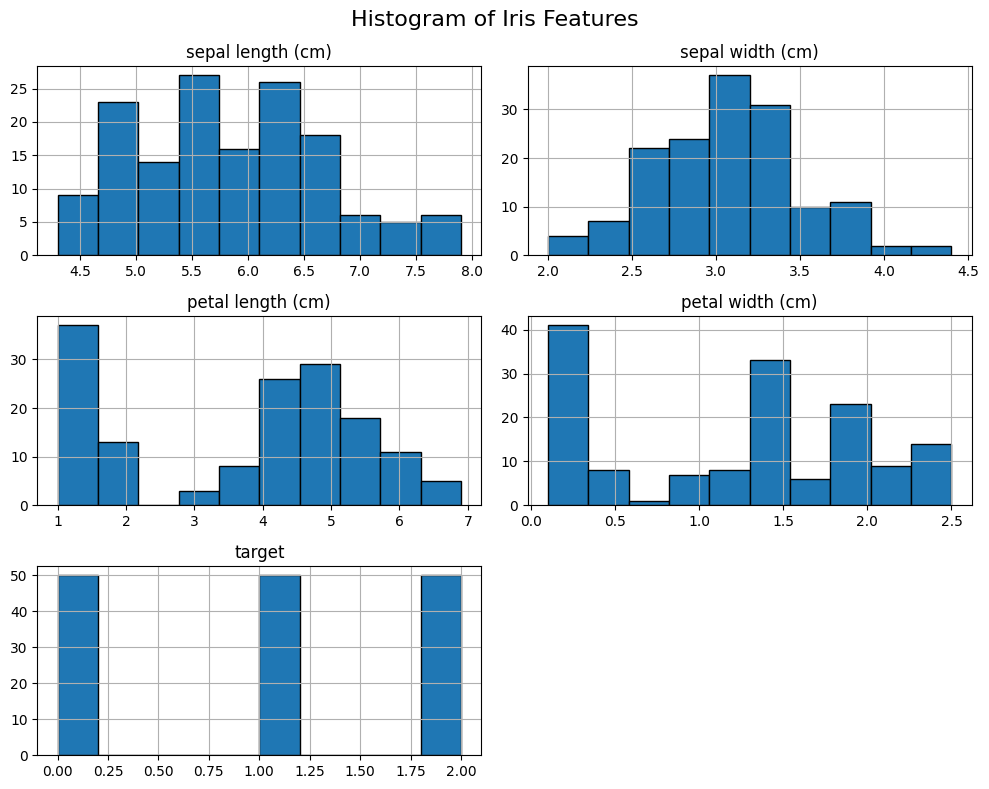

In [49]:
#visualizing the dataset using matplotlib

df.hist(figsize=(10, 8), edgecolor='black')
plt.suptitle("Histogram of Iris Features", fontsize=16)
plt.tight_layout()
plt.show()


# Distribution of each feature.

# To identify skewed data or outliers.

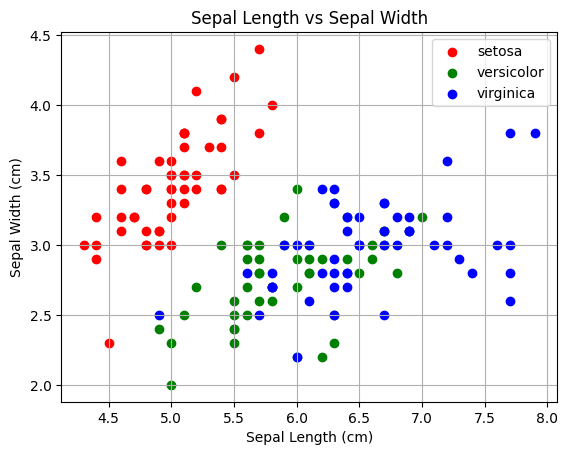

In [50]:
colors = ['red', 'green', 'blue']
species = iris.target_names

for i, species_name in enumerate(species):
    subset = df[df['target'] == i]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
                label=species_name, color=colors[i])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

# For seeing class separability using sepal features.

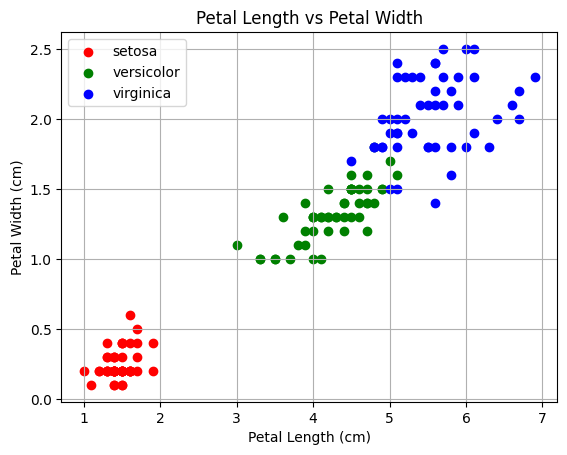

In [51]:
for i, species_name in enumerate(species):
    subset = df[df['target'] == i]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'],
                label=species_name, color=colors[i])

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.grid(True)
plt.show()


Petal dimensions separate classes more clearly.

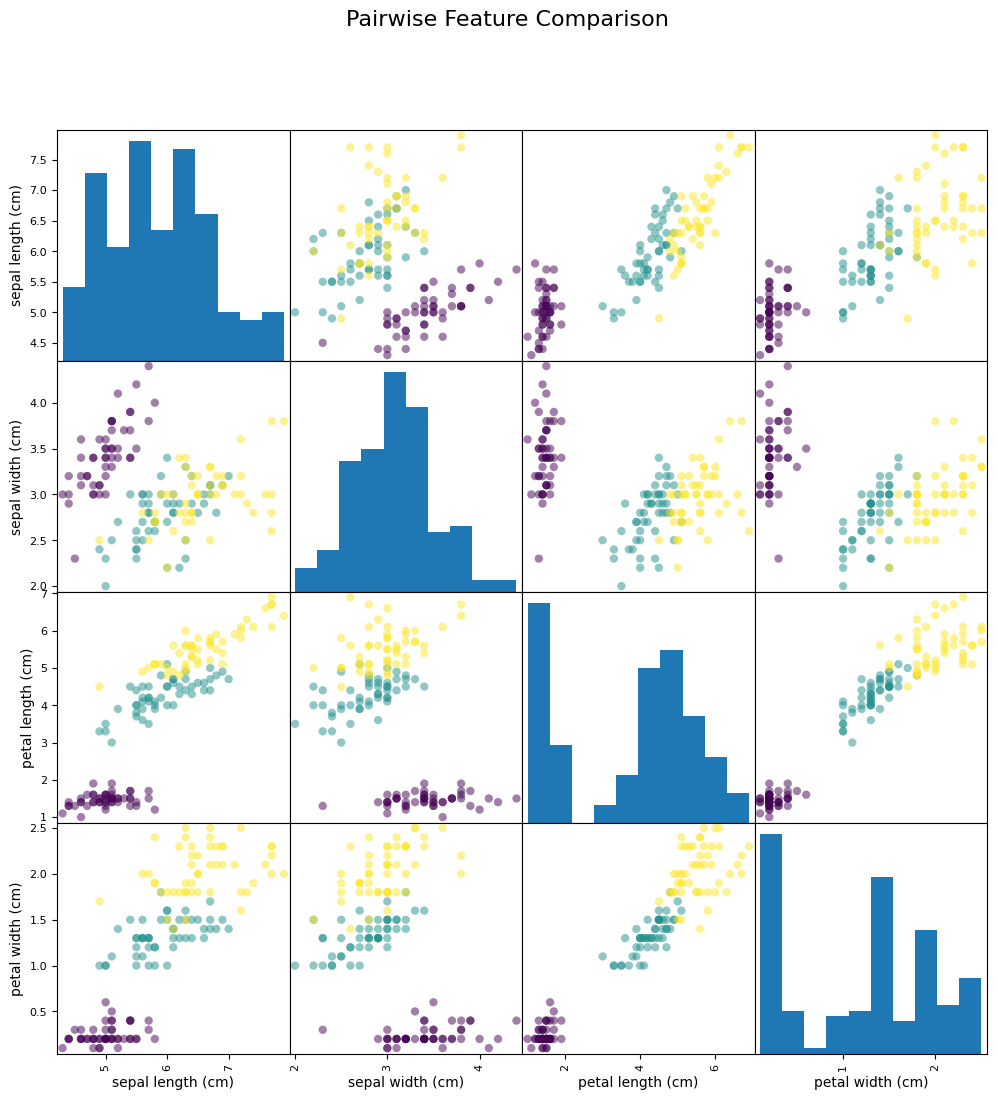

In [52]:
pd.plotting.scatter_matrix(df.iloc[:, :4], figsize=(12, 12), c=df['target'], cmap='viridis', marker='o')
plt.suptitle("Pairwise Feature Comparison", fontsize=16)
plt.show()

Each subplot is a comparison between two features.

Diagonals show histograms.

Colored by species.

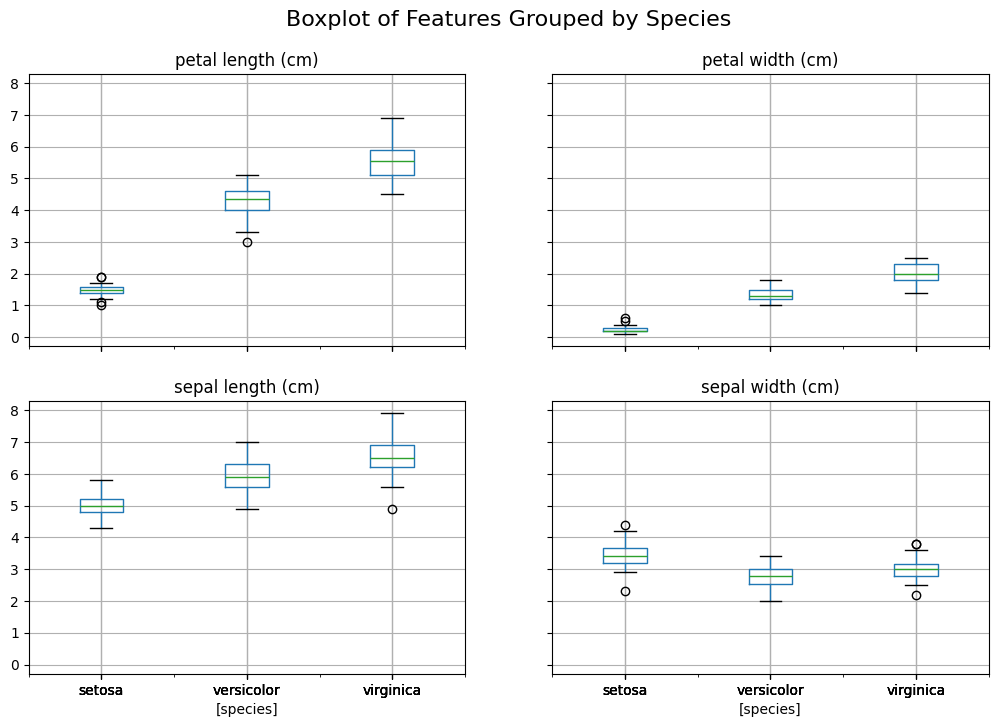

In [53]:
#Using Box Plot for Feature Comparison

df.drop(columns='target').boxplot(by='species', figsize=(12, 8))
plt.suptitle("Boxplot of Features Grouped by Species", fontsize=16)
plt.show()

TRAINING A K NEAREST NEIGHBOURS [KNN] CLASSIFIER

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
# Features (X): all 4 numeric columns
X = df[iris.feature_names]

# Labels (y): target column
y = df['target']

In [57]:
#Test-Train Split [20% testing ; 80% Training]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [59]:
#Training KNN Classifier

knn = KNeighborsClassifier(n_neighbors=3)  # k=3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
y_pred = knn.predict(X_test) #Prediction on test set

In [61]:
#Model Evaluation

#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



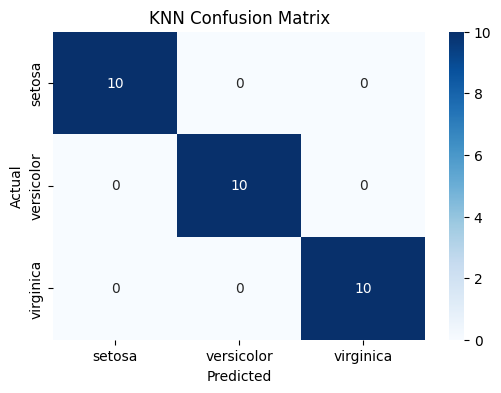

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()


In [63]:
#Trying different K values also

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    print(f"k={k}: Accuracy={acc:.2f}")


k=1: Accuracy=0.97
k=2: Accuracy=0.93
k=3: Accuracy=1.00
k=4: Accuracy=1.00
k=5: Accuracy=1.00
k=6: Accuracy=0.97
k=7: Accuracy=0.97
k=8: Accuracy=0.97
k=9: Accuracy=1.00
k=10: Accuracy=1.00
